In [320]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/top-spotify-songs-from-20102019-by-year/top10s.csv


In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [322]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-from-20102019-by-year/top10s.csv', encoding='latin1')
df.head()
df.shape

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


(603, 15)

In [323]:
df = df.rename(columns = {'Unnamed: 0': 'id'})
df.head()

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [324]:
df.isnull().any()

id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [325]:
df = df.drop_duplicates()
df.shape

(603, 15)

In [326]:
df = df.drop(['id'], axis=1)
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [327]:
df['top genre'].value_counts().head()
df['artist'].value_counts().head()
df['title'].value_counts().head()
df['year'].value_counts().head()

dance pop        327
pop               60
canadian pop      34
boy band          15
barbadian pop     15
Name: top genre, dtype: int64

Katy Perry       17
Justin Bieber    16
Rihanna          15
Maroon 5         15
Lady Gaga        14
Name: artist, dtype: int64

Castle Walls (feat. Christina Aguilera)    2
All I Ask                                  2
Company                                    2
Just the Way You Are                       2
Runnin' (Lose It All)                      2
Name: title, dtype: int64

2015    95
2016    80
2013    71
2017    65
2018    64
Name: year, dtype: int64

In [328]:
df[df.title == 'Company']

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
301,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72
396,Company,Justin Bieber,canadian pop,2016,95,80,59,-5,8,43,208,13,6,72


# Drop year, title, and deduplicate rows

In [329]:
yearless_df = df.drop(['year', 'title', 'pop'], axis=1)
yearless_df.drop_duplicates()

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4
1,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,dance pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...,...
598,Mark Ronson,dance pop,104,66,61,-7,20,16,176,1,3
599,Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12
600,DJ Khaled,dance pop,136,76,53,-5,9,65,260,7,34
601,Mark Ronson,dance pop,114,79,60,-6,42,24,217,1,7


In [330]:
df['top genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
australian dance               6
complextro                     6
hip pop                        6
australian pop                 5
edm                            5
atl hip hop                    5
permanent wave                 4
latin                          4
hip hop                        4
tropical house                 3
colombian pop                  3
indie pop                      2
candy pop                      2
folk-pop                       2
detroit hip hop                2
canadian hip hop               2
belgian edm                    2
downtempo                      2
baroque pop                    2
escape roo

# Super categorization of top genre's feature

In [331]:
for i in yearless_df['top genre']:
    if 'pop' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'pop')
        
    elif 'hip hop' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'hip hop')

    elif 'edm' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'edm')

    elif 'r&b' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'pop')

    elif 'latin' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'latin')

    elif 'room' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'room')

    elif 'electro' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'edm')
        
yearless_df['top genre'] = yearless_df['top genre'].replace('chicago rap', 'hip hop')
        
yearless_df["top genre"]

0      neo mellow
1         hip hop
2             pop
3             pop
4             pop
          ...    
598           pop
599           pop
600           pop
601           pop
602           pop
Name: top genre, Length: 603, dtype: object

In [332]:
yearless_df['top genre'].value_counts()

pop                        495
boy band                    15
hip hop                     15
room                        12
edm                         12
british soul                11
neo mellow                   9
australian dance             6
complextro                   6
latin                        5
permanent wave               4
tropical house               3
brostep                      2
downtempo                    2
house                        1
celtic rock                  1
hollywood                    1
alaska indie                 1
irish singer-songwriter      1
contemporary country         1
Name: top genre, dtype: int64

In [333]:
yearless_df

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4
1,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...,...
598,Mark Ronson,pop,104,66,61,-7,20,16,176,1,3
599,Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12
600,DJ Khaled,pop,136,76,53,-5,9,65,260,7,34
601,Mark Ronson,pop,114,79,60,-6,42,24,217,1,7


In [334]:
# genre_df = pd.DataFrame(yearless_df['top genre'].value_counts()).reset_index()
# genre_df.columns = ['top genre','count']
# genre_df['top_genre_modeling'] = genre_df['top genre'] 
# genre_df.loc[genre_df['count']< 4,'top_genre_modeling'] = 'other'
# genre_df = genre_df.drop(['top genre'], axis=1)
# genre_df

In [335]:
temp_df = yearless_df
value_counts = temp_df.stack().value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= 3].index
temp_df.replace(to_remove, 'other', inplace=True)
temp_df['top genre'].value_counts()
temp_df.head()
temp_df.shape

pop                 495
boy band             15
hip hop              15
other                13
room                 12
edm                  12
british soul         11
neo mellow            9
australian dance      6
complextro            6
latin                 5
permanent wave        4
Name: top genre, dtype: int64

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,other,neo mellow,97,89,67,-4,8,80,217,19,4
1,other,hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,pop,other,92,70,-4,8,71,other,0,4
4,Bruno Mars,pop,other,84,64,-5,9,43,221,2,4


(603, 11)

In [336]:
yearless_df['top genre'] = temp_df['top genre']
yearless_df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist']] = df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist']]
yearless_df['top genre'].value_counts()
yearless_df.head()

pop                 495
boy band             15
hip hop              15
other                13
room                 12
edm                  12
british soul         11
neo mellow            9
australian dance      6
complextro            6
latin                 5
permanent wave        4
Name: top genre, dtype: int64

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4
1,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4


In [337]:
new_df = yearless_df
new_df.artist.unique()

array(['Train', 'Eminem', 'Kesha', 'Lady Gaga', 'Bruno Mars',
       'Justin Bieber', 'Taio Cruz', 'OneRepublic', 'Alicia Keys',
       'Rihanna', 'Flo Rida', 'Mike Posner', 'Far East Movement', 'Usher',
       'Sean Kingston', 'The Black Eyed Peas', 'Adam Lambert', 'Maroon 5',
       'Neon Trees', 'Selena Gomez & The Scene', 'Enrique Iglesias',
       'Katy Perry', 'Britney Spears', '3OH!3', 'David Guetta',
       'Christina Aguilera', 'Florence + The Machine', 'Shakira',
       'Tinie Tempah', 'T.I.', 'Martin Solveig', 'Christina Perri',
       'Adele', 'Pitbull', 'Beyoncé', 'Hot Chelle Rae', 'Avril Lavigne',
       'Kanye West', 'LMFAO', 'Jessie J', 'Jennifer Lopez', 'Chris Brown',
       'Sleeping At Last', 'Nicki Minaj', 'P!nk', 'Coldplay',
       'One Direction', 'Taylor Swift', 'Carly Rae Jepsen',
       'Kelly Clarkson', 'Owl City', 'The Wanted', 'fun.',
       'Ellie Goulding', 'Gym Class Heroes', 'Avicii', 'The Script',
       'Miley Cyrus', 'Swedish House Mafia', 'Daft Punk'

In [338]:
new_df.isnull().any()
new_df = new_df.drop_duplicates()
new_df = new_df.reset_index(drop=True)
new_df.head()

artist       False
top genre    False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4
1,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  57., 528.]),
 array([-60. , -54.2, -48.4, -42.6, -36.8, -31. , -25.2, -19.4, -13.6,
         -7.8,  -2. ]),
 <a list of 10 Patch objects>)

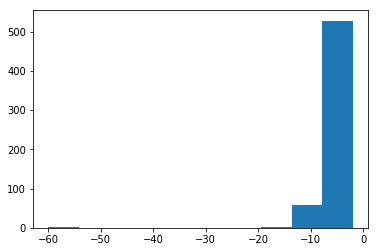

(array([  1.,   0.,   1.,  26., 138., 179., 172.,  39.,  18.,  13.]),
 array([  0. ,  20.6,  41.2,  61.8,  82.4, 103. , 123.6, 144.2, 164.8,
        185.4, 206. ]),
 <a list of 10 Patch objects>)

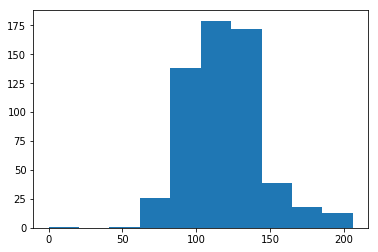

(array([  2.,   3.,   5.,  22.,  30.,  54., 104., 147., 165.,  55.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <a list of 10 Patch objects>)

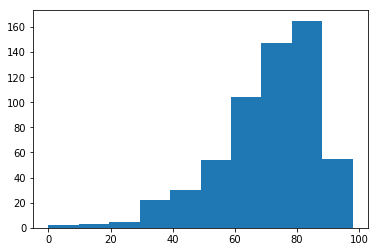

(array([ 70., 283.,  79.,  42.,  60.,  28.,   7.,   4.,   8.,   6.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <a list of 10 Patch objects>)

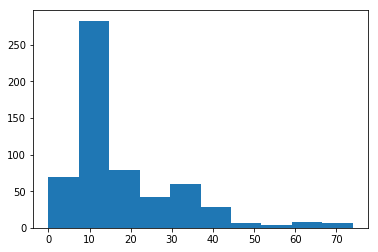

(array([16., 34., 59., 70., 77., 91., 89., 63., 60., 28.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <a list of 10 Patch objects>)

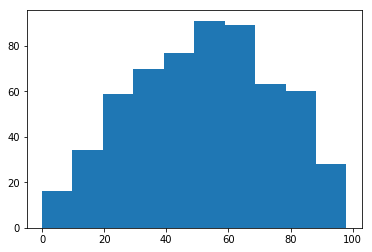

(array([  8.,  66., 219., 183.,  73.,  23.,   9.,   3.,   1.,   2.]),
 array([134., 163., 192., 221., 250., 279., 308., 337., 366., 395., 424.]),
 <a list of 10 Patch objects>)

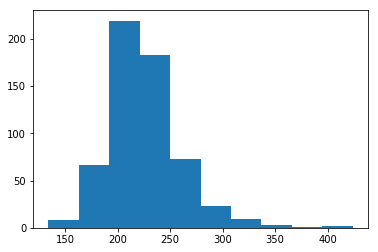

(array([361.,  94.,  46.,  22.,  20.,  13.,   4.,   8.,  13.,   6.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

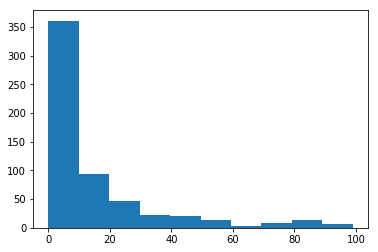

(array([202., 242.,  68.,  28.,  14.,  14.,   7.,   7.,   2.,   3.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <a list of 10 Patch objects>)

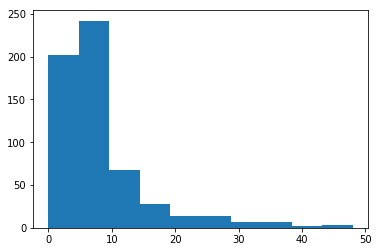

In [339]:
plt.hist(new_df.dB)
plt.show()
plt.hist(new_df.bpm)
plt.show()
plt.hist(new_df.nrgy)
plt.show()
plt.hist(new_df.live)
plt.show()
plt.hist(new_df.val)
plt.show()
plt.hist(new_df.dur)
plt.show()
plt.hist(new_df.acous)
plt.show()
plt.hist(new_df.spch)
plt.show()

In [340]:
new_df

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4
1,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...,...
582,Mark Ronson,pop,104,66,61,-7,20,16,176,1,3
583,Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12
584,DJ Khaled,pop,136,76,53,-5,9,65,260,7,34
585,Mark Ronson,pop,114,79,60,-6,42,24,217,1,7


In [341]:
new_df.bpm.unique()
new_df.dB.unique()

array([ 97,  87, 120, 119, 109,  65, 148,  93, 126, 128, 145, 130, 122,
       125, 121,  99, 186, 103, 146, 133, 129, 135, 138,  92, 111, 164,
       131, 150, 104, 182, 112,  43,  91,  80, 139, 105, 127,  94, 110,
       100, 124, 175,  95, 152, 132,  63,  84,  75,  98, 144, 140,  77,
       117, 108,  86, 116, 160, 134, 184,  90, 114,  85, 180, 170, 174,
       155, 118, 185, 136,  82, 102, 107, 201,  96,  83, 192,  76, 149,
        79, 113, 115, 206, 190, 158, 176, 123, 106,  78, 156,  89, 202,
       142, 163, 101,   0, 159,  81,  73, 178, 181, 167, 172,  88, 168])

array([ -4,  -5,  -3,  -6,  -8,  -7,  -2,  -9, -11, -12, -10, -15, -13,
       -60])

In [342]:
new_df.bpm = new_df.bpm.replace(0, new_df.bpm.mean())
new_df.bpm.unique()
new_df.dB = new_df.dB.replace(-60, new_df.dB.mean())
new_df.dB.unique()

array([ 97.       ,  87.       , 120.       , 119.       , 109.       ,
        65.       , 148.       ,  93.       , 126.       , 128.       ,
       145.       , 130.       , 122.       , 125.       , 121.       ,
        99.       , 186.       , 103.       , 146.       , 133.       ,
       129.       , 135.       , 138.       ,  92.       , 111.       ,
       164.       , 131.       , 150.       , 104.       , 182.       ,
       112.       ,  43.       ,  91.       ,  80.       , 139.       ,
       105.       , 127.       ,  94.       , 110.       , 100.       ,
       124.       , 175.       ,  95.       , 152.       , 132.       ,
        63.       ,  84.       ,  75.       ,  98.       , 144.       ,
       140.       ,  77.       , 117.       , 108.       ,  86.       ,
       116.       , 160.       , 134.       , 184.       ,  90.       ,
       114.       ,  85.       , 180.       , 170.       , 174.       ,
       155.       , 118.       , 185.       , 136.       ,  82. 

array([ -4.        ,  -5.        ,  -3.        ,  -6.        ,
        -8.        ,  -7.        ,  -2.        ,  -9.        ,
       -11.        , -12.        , -10.        , -15.        ,
       -13.        ,  -5.56899489])

In [343]:
temp_df = pd.get_dummies(new_df[['artist', 'top genre']])
new_df = new_df.join(temp_df, how='left')
new_df = new_df.drop(columns = ['artist', 'top genre'], axis=1)
new_df.shape

(587, 205)

# We have to check for collinearity and reduce dimensionality

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Variance (%)')

Text(0.5, 1.0, 'Pulsar Dataset Explained Variance')

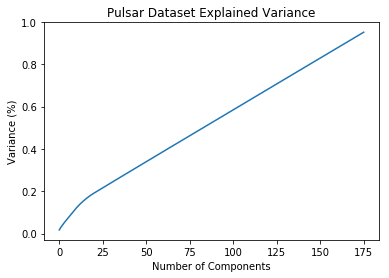

In [344]:
X_std = StandardScaler().fit_transform(new_df)
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_std) # Plot the explained variances

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

# plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# PCA_components = pd.DataFrame(principalComponents)

In [345]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(principalComponents)

[Text(0, 0.5, 'sum of squared distances'),
 Text(0.5, 0, 'K'),
 Text(0.5, 1.0, 'Elbow graph')]

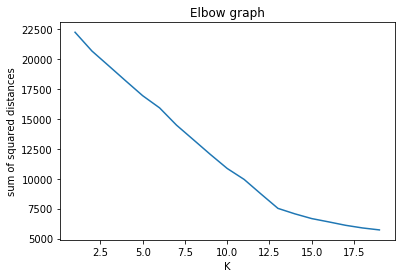

In [346]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    sum_of_squared_distances.append(km.inertia_)
    
ax = sns.lineplot(x=K, y = sum_of_squared_distances)
ax.set(xlabel='K', ylabel='sum of squared distances', title='Elbow graph')

In [347]:
kmeans = KMeans(n_clusters=13)    
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([11,  7,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  7,  0,
       10, 10,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,
       10,  0, 10,  0,  0, 10,  0, 10, 10,  0, 10,  0,  0,  7,  7,  0,  3,
       10,  8,  0,  8,  0,  0,  0, 10,  0,  0,  0,  7, 10,  0,  0,  0, 10,
       10,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,
       10,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        6,  0,  1, 10,  0,  0,  8,  0,  0, 10,  0,  0,  0,  1,  0,  0, 10,
       10,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0, 10,  0,  0,
        3,  1, 10,  5,  0, 10,  3, 12, 10, 10,  0,  0,  0,  4, 10,  0,  0,
        7,  1,  1,  0, 12,  0,  0,  0,  0, 10, 10,  0, 10,  0, 10, 10,  0,
        0,  0,  0,  0,  0,  1,  0, 10, 10, 10,  0, 10, 10, 10,  0,  0,  1,
        6,  0, 10,  0, 10,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        7, 11, 10,  0,  0,  0,  0,  0,  3,  0,  0, 10,  0,  0, 10, 10,  5,
       10,  0, 10,  1,  7

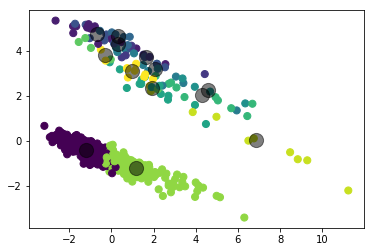

In [348]:
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Spotify Dendograms')

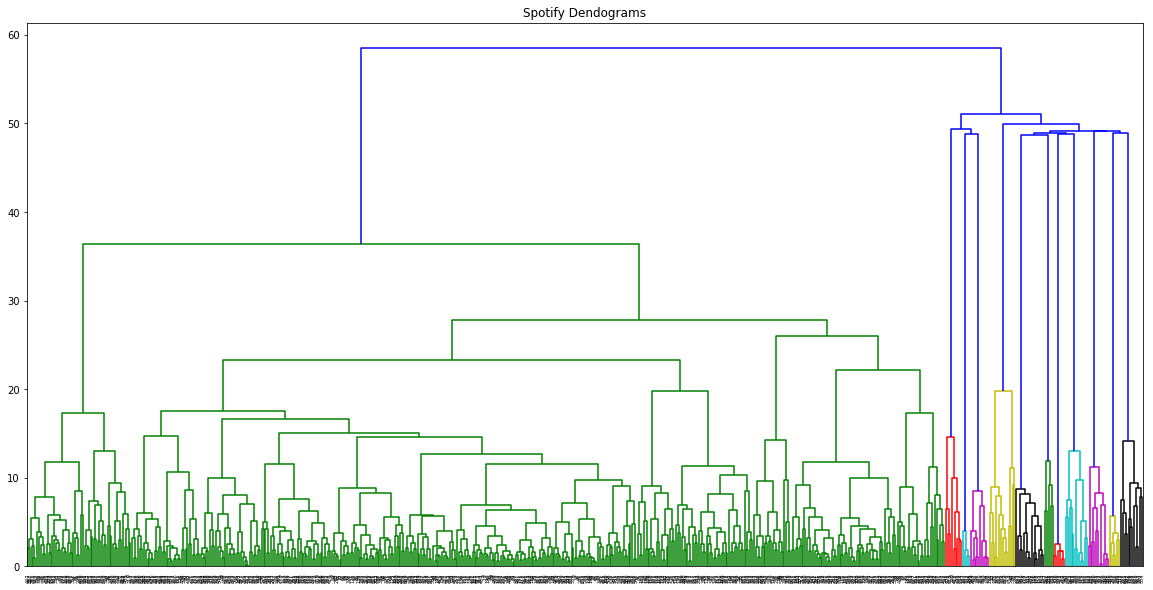

In [349]:
plt.figure(figsize=(20, 10))
plt.title("Spotify Dendograms")
dendogram = dendrogram(linkage(pca_df, method='ward'))

In [350]:
ac = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')
ac.fit_predict(pca_df)

array([ 4,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  2,  0,  0,  0,  0,  2,  0,  0,  2,  0,  0,  1,  1,  0, 12,
        2,  7,  0,  7,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       10,  0, 11,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       12, 11,  0,  5,  0,  0, 12,  6,  0,  0,  0,  0,  0,  9,  0,  0,  0,
        1, 11, 11,  0,  6,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 11,  0,  2,  0,  0,  0,  2,  2,  0,  0,  0, 11,
       10,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        1,  4,  2,  0,  0,  0,  0,  0, 12,  0,  0,  2,  0,  0,  0,  0,  5,
        0,  0,  0, 11,  1

In [351]:
dbscan = DBSCAN(eps = 9, min_samples = 3)
dbscan.fit(pca_df)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

DBSCAN(algorithm='auto', eps=9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

Estimated number of clusters: 12


In [352]:
kmeans_labels = pd.DataFrame(kmeans.labels_)
ac_labels = pd.DataFrame(ac.labels_)
dbscan_labels = pd.DataFrame(dbscan.labels_)

silhouette_score(pca_df, kmeans_labels, metric='euclidean')
silhouette_score(pca_df, ac_labels, metric='euclidean')
silhouette_score(pca_df, dbscan_labels, metric='euclidean')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23782170419605492

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2745883749048556

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5389480606507756

In [356]:
dbscan_df = new_df.join(dbscan_labels, how='left')
dbscan_df = dbscan_df.rename(columns = {0: 'labels'})
dbscan_df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_3OH!3,...,top genre_complextro,top genre_edm,top genre_hip hop,top genre_latin,top genre_neo mellow,top genre_other,top genre_permanent wave,top genre_pop,top genre_room,labels
0,97.0,89,67,-4.0,8,80,217,19,4,0,...,0,0,0,0,1,0,0,0,0,0
1,87.0,93,75,-5.0,52,64,263,24,23,0,...,0,0,1,0,0,0,0,0,0,1
2,120.0,84,76,-3.0,29,71,200,10,14,0,...,0,0,0,0,0,0,0,1,0,2
3,119.0,92,70,-4.0,8,71,295,0,4,0,...,0,0,0,0,0,0,0,1,0,2
4,109.0,84,64,-5.0,9,43,221,2,4,0,...,0,0,0,0,0,0,0,1,0,2


In [389]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(new_df)
df_scaled['dbscan'] = dbscan.labels_
df_mean = (df_scaled.loc[df_scaled.dbscan!=-1, :].groupby('dbscan').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
    selected_columns = list(results.sort_values('Var', ascending=False,).head(7).Variable.values) + ['dbscan']
    tidy = df_scaled[selected_columns].melt(id_vars='dbscan')

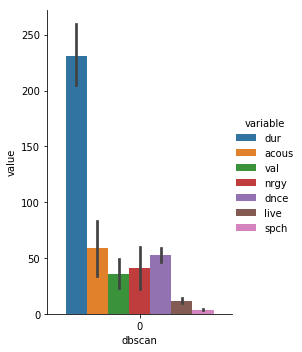

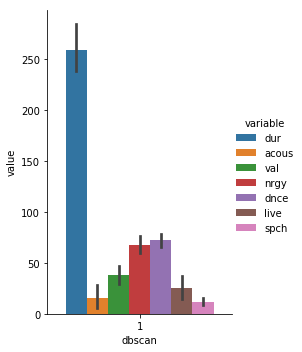

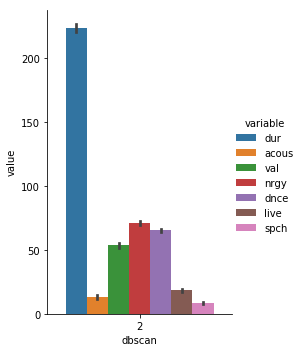

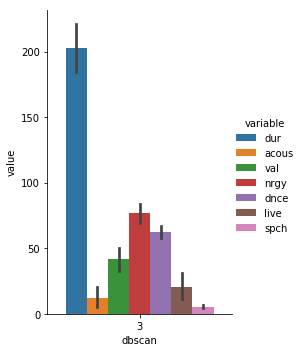

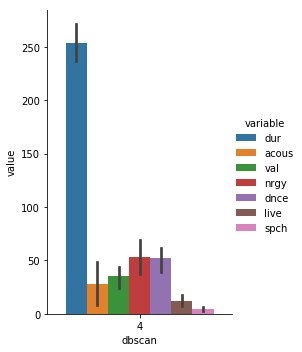

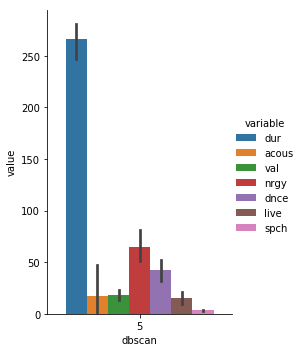

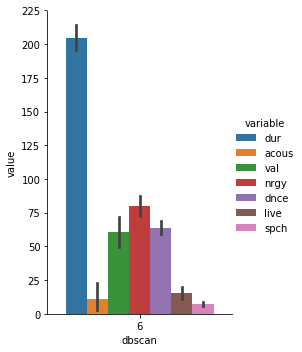

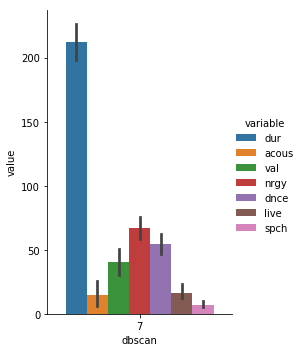

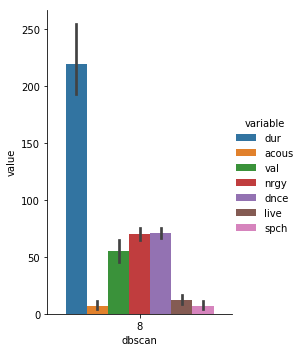

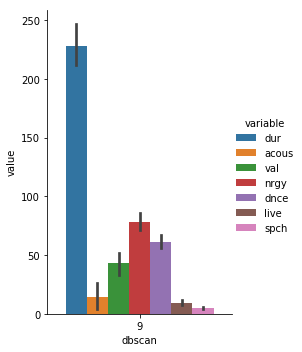

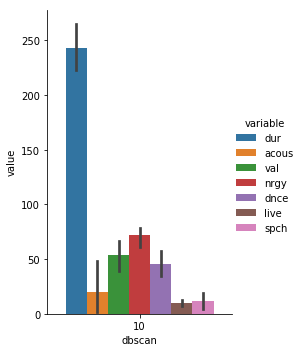

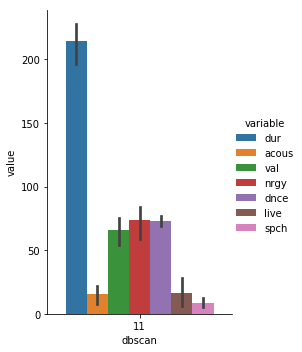

In [393]:
# 12 is the number of clusters in DBScan
for i in range(12):
    sns.catplot(x='dbscan', y='value', hue='variable', data=tidy[tidy['dbscan']==i], height=5, aspect=.7, kind='bar')

# You can see the results of the clusters here and it seems that the dur feature has the highest in all of the clusters 